<a href="https://colab.research.google.com/github/mukulpalmia07/Youtube_Streamer_Analysis/blob/main/Data_Analysis_on_Top_Youtubers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA ANALYSIS ON TOP YOUTUBERS

Importing Dependencies

In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing the Dataset

In [16]:
youtube_data = pd.read_csv('/content/youtubers_df.csv', encoding = 'ISO-8859-1')

In [17]:
youtube_data.shape

(1000, 9)

In [18]:
youtube_data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


#DATA EXPLORATION AND CLEANING

In [19]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [20]:
youtube_data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [21]:
youtube_data = youtube_data.rename(columns = {'Suscribers': 'Subscribers'})

In [22]:
youtube_data.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [23]:
youtube_data.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [24]:
youtube_data.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [25]:
youtube_data['Categories'].fillna('Unknown', inplace = True)

In [26]:
youtube_data.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

#CHECKING THE OUTLIERS

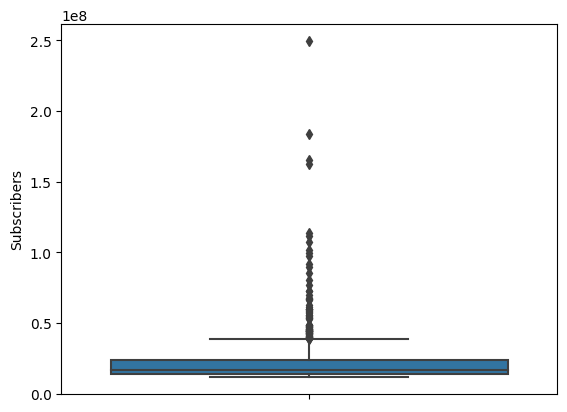

In [27]:
sb.boxplot(y = youtube_data['Subscribers'])
plt.show()

#REMOVING THE OUTLIERS

Removing the outliers for column

In [28]:
column1 = 'Subscribers'
# Calculating the interquartile range (IQR)
q1 = youtube_data[column1].quantile(0.25)
q3 = youtube_data[column1].quantile(0.75)
IQR = q3 - q1
IQR

9900000.0

In [29]:
# Defining the lower bound and upper bound for the outliers
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [31]:
# Filtering the DataFrame to remove outliers
youtube_data_outliers = youtube_data[(youtube_data[column1] >= lower_bound) & (youtube_data[column1] <= upper_bound)]

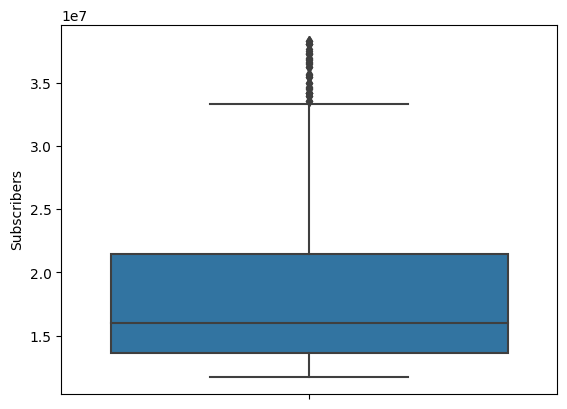

In [32]:
# Boxplot without outliers
sb.boxplot(y = youtube_data_outliers[column1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

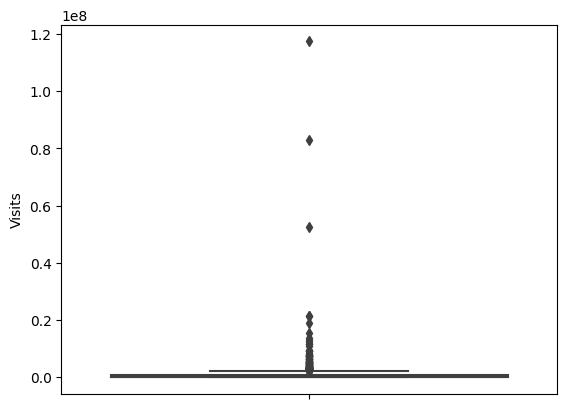

In [35]:
sb.boxplot(y = youtube_data['Visits'])
plt.show

Removing the outliers for Visit

In [36]:
column2 = "Visits"
q1 = youtube_data[column2].quantile(0.25)
q3 = youtube_data[column2].quantile(0.75)
IQR_visits = q3 - q1
IQR_visits

833500.0

In [37]:
lower_bound = q1 - 1.5 * IQR_visits
upper_bound = q3 + 1.5 * IQR_visits

In [38]:
youtube_data_outliers = youtube_data[(youtube_data[column2] >= lower_bound) & (youtube_data[column2] <= upper_bound)]

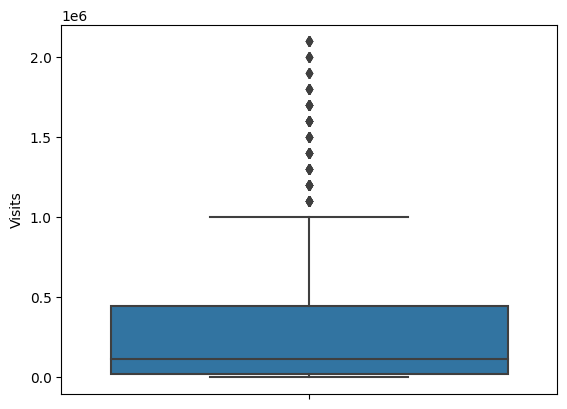

In [39]:
sb.boxplot(y = youtube_data_outliers[column2])
plt.show()

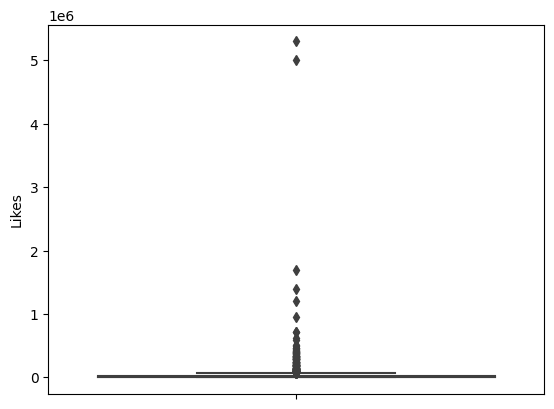

In [40]:
sb.boxplot(y = youtube_data['Likes'])
plt.show()

Removing the outliers for Likes

In [41]:
column3 = 'Likes'
q1 = youtube_data[column3].quantile(0.25)
q3 = youtube_data[column3].quantile(0.75)
IQR_likes = q3 - q1
IQR_likes

28178.25

In [42]:
lower_bound = q1 - 1.5 * IQR_likes
upper_bound = q3 + 1.5 * IQR_likes

In [43]:
youtube_data_outliers = youtube_data[(youtube_data[column3] >= lower_bound) & (youtube_data[column3] <= upper_bound)]

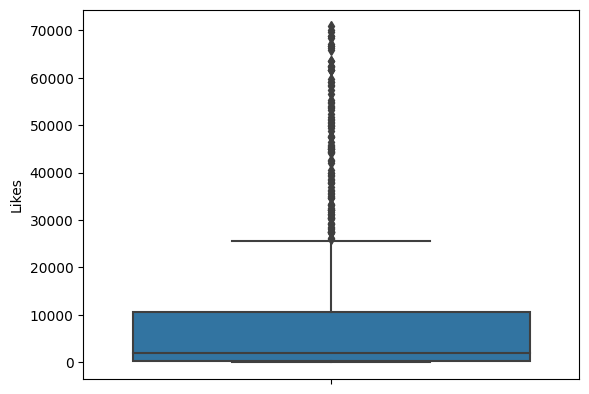

In [44]:
sb.boxplot(y = youtube_data_outliers[column3])
plt.show()

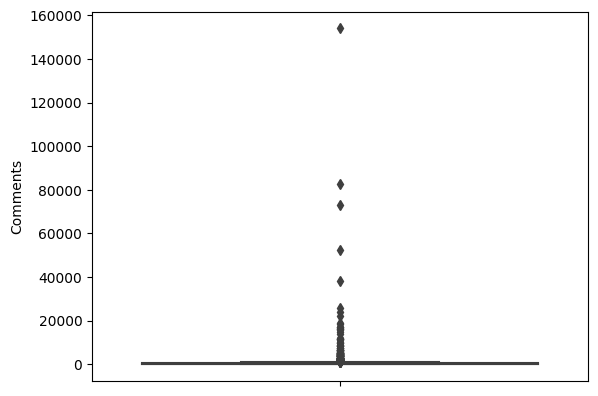

In [45]:
sb.boxplot(y = youtube_data['Comments'])
plt.show()

Removing the outliers for Comments

In [46]:
column4 = 'Comments'
q1 = youtube_data[column4].quantile(0.25)
q3 = youtube_data[column4].quantile(0.75)
IQR_comments = q3 - q1
IQR_comments

470.0

In [47]:
lower_bound = q1 - 1.5 * IQR_comments
upper_bound = q3 + 1.5 * IQR_comments

In [48]:
youtube_data_outliers = youtube_data[(youtube_data[column4] >= lower_bound) & (youtube_data[column4] <= upper_bound)]

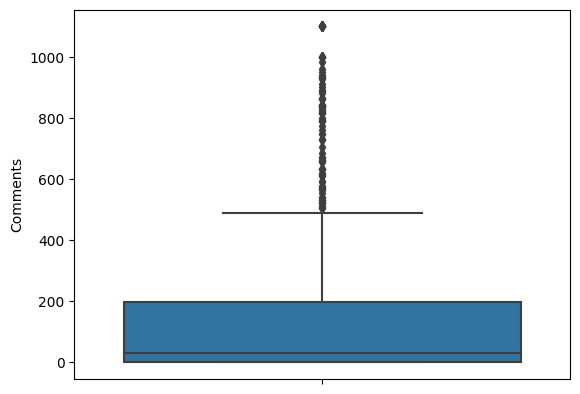

In [51]:
sb.boxplot(y = youtube_data_outliers[column4])
plt.show()

#PERFORMANCE METRICS

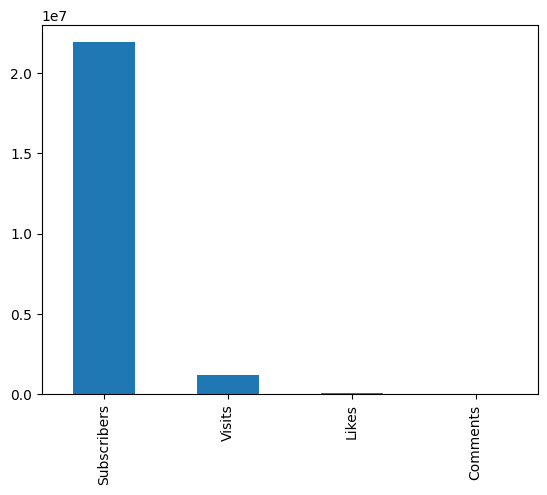

In [52]:
average_metrics = youtube_data[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics.plot(kind = 'bar')
plt.show()

#CONTENT CATEGORIES

In [54]:
category_distribution = youtube_data['Categories'].value_counts()
print(category_distribution)

Unknown                               306
MÃºsica y baile                       160
PelÃ­culas, AnimaciÃ³n                 61
MÃºsica y baile, PelÃ­culas            41
Vlogs diarios                          37
Noticias y PolÃ­tica                   36
PelÃ­culas, Humor                      34
AnimaciÃ³n, Videojuegos                34
AnimaciÃ³n, Juguetes                   29
AnimaciÃ³n, Humor                      27
PelÃ­culas                             24
EducaciÃ³n                             24
AnimaciÃ³n                             22
Videojuegos                            19
Videojuegos, Humor                     17
MÃºsica y baile, AnimaciÃ³n            16
Ciencia y tecnologÃ­a                  14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
PelÃ­culas, Juguetes                    9
PelÃ­culas, Videojuegos                 8
Deportes                                8
MÃºsica y baile, Humor            

#PERFORMING KMEANS CLUSTERING

To ensure that the values have a mean 0 and standard deviation 1

In [55]:
scaler = StandardScaler()
scaled_metric = scaler.fit_transform(youtube_data[['Subscribers', 'Visits', 'Likes', 'Comments']])
kmeans = KMeans(n_clusters = 2)
youtube_data['cluster'] = kmeans.fit_predict(scaled_metric)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top performing content creator

In [56]:
performer = youtube_data[youtube_data['cluster'] == 1]
performer

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,cluster
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,1
136,137,MrBeast2,Vlogs diarios,31300000.0,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...,1


#DATAFRAME SHAPE

Before removing outliers

In [57]:
youtube_data.shape

(1000, 10)

After removing outliers

In [58]:
youtube_data_outliers.shape

(849, 9)

#CONCLUSION



* The analysis provided valuable insights into the top YouTube streamers.
* Missing values were handled, outliers were removed, and K-Means clustering was applied to identify potential high-performing creators.
* The overall goal was to refine the dataset and improve the accuracy of subsequent analyses.

In summary, the analysis helps in understanding the characteristics of top YouTubers, identifying outliers, and clustering them based on performance metrics. The results can be further utilized for strategic decision-making in the context of content creation and audience engagement.